# Life Expectancy and GDP

#### Analysing data on GDP and life expectancy from the World Health Organisation and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

***Importing all the relevant libraries required for the project.***

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

***Loading the `csv` file into a pandas dataframe and saving it to a variable called `df`.***

In [2]:
df = pd.read_csv("all_data.csv")

***Inpecting the dataframe using the `head()` function and printing the first 5 rows of the dataset.***

In [3]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


**Inspecting all the unique values in the `Country` column and saving it as a list into a variable called `countries` for later use.***

***Printing the new variable to inspect the countries present in the dataset.***

In [4]:
countries = df.Country.unique().tolist()
print(countries)

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']


**_Inspecting all the unique values in the `Year` column and saving it as a list into a variable called `years` for later use._**

**_Printing the new variable to inspect the years present in the dataset._**

In [5]:
years = df.Year.unique().tolist()
print(years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


***Creating a function called `avg_life_expectancy_by_year` that takes `year` as a parameter and returns the average life expectancy of all countries in the dataset for a given year.***

In [6]:
def avg_life_expectancy_by_year(year):
    return np.mean(df[df["Year"] == year]["Life expectancy at birth (years)"])

***Creating a for-loop to print out the average life expectancy for each year in the dataset.***

In [7]:
print("Average Life Expectancy by Year")
for n in years:
    print(str(n) + ": " + str(round(avg_life_expectancy_by_year(n),1)))

Average Life Expectancy by Year
2000: 70.8
2001: 70.8
2002: 71.0
2003: 71.0
2004: 71.3
2005: 71.5
2006: 72.0
2007: 72.3
2008: 72.7
2009: 73.1
2010: 73.5
2011: 74.2
2012: 74.6
2013: 75.0
2014: 75.3
2015: 75.7


***Creating a function called `life_expectancy_by_country_year` that takes `country` and `year` as parameters and returns the life expectancy from the dataset for the given country and year.***

In [8]:
def life_expectancy_by_country_year(country, year):
    return df[(df["Year"] == year) & (df["Country"] == country)]["Life expectancy at birth (years)"].item()

In [9]:
life_expectancy_by_country_year("China", 2005)

73.9

***Creating a function called `compare_country_to_avg_life_expectancy_by_year` that compares a given countries life expectancy against the average for a given year. The function uses the two previously created functions: `avg_life_expectancy_by_year` and `life_expectancy_by_country_year`.***

In [10]:
def compare_country_to_avg_life_expectancy_by_year(country, year):
    print(country + " vs Average Life Expectancy in " + str(year))
    print(country + ": " + str(life_expectancy_by_country_year(country, year)))
    print("Average: " + str(round(avg_life_expectancy_by_year(year),1)))

In [11]:
compare_country_to_avg_life_expectancy_by_year("Germany", 2014)

Germany vs Average Life Expectancy in 2014
Germany: 80.9
Average: 75.3


***Creating a new `gdp_trillions` column that converts `GDP` into trillions for better readability.***

In [12]:
df["gdp_trillions"] = df["GDP"] / 1000000000000

df.head()

,Country,Year,Life expectancy at birth (years),GDP,gdp_trillions
0,Chile,2000,77.3,7.786093e+10,0.077861
1,Chile,2001,77.3,7.097992e+10,0.070980
2,Chile,2002,77.8,6.973681e+10,0.069737
3,Chile,2003,77.9,7.564346e+10,0.075643
4,Chile,2004,78.0,9.921039e+10,0.099210


***Creating a function called `avg_gdp_by_year` that takes `year` as a parameter and returns the average GDP (in trillions) of all countries in the dataset for a given year.***

In [13]:
def avg_gdp_by_year(year):
    return np.mean(df[df["Year"] == year]["gdp_trillions"])

***Creating a for-loop to print out the average GDP (in trillions) for each year in the dataset.***

In [14]:
print("Average GDP by Year in Trillions")
for n in years:
    print(str(n) + ": " + str(round(avg_gdp_by_year(n),2)))

Average GDP by Year in Trillions
2000: 2.37
2001: 2.45
2002: 2.56
2003: 2.74
2004: 2.99
2005: 3.21
2006: 3.46
2007: 3.79
2008: 4.06
2009: 4.0
2010: 4.3
2011: 4.71
2012: 4.96
2013: 5.27
2014: 5.56
2015: 5.66


***Creating a function called `gdp_by_country_year` that takes `country` and `year` as parameters and returns the GDP (in trillions) from the dataset for the given country and year.***

In [15]:
def gdp_by_country_year(country, year):
    return round(df[(df["Year"] == year) & (df["Country"] == country)]["gdp_trillions"].item(),2)

In [16]:
gdp_by_country_year("China", 2005)

2.29

***Creating a function called `compare_country_to_avg_gdp_by_year` that compares a given countries GDP against the average for a given year. The function uses the two previously created functions: `avg_gdp_by_year` and `gdp_by_country_year`.***

In [17]:
def compare_country_to_avg_gdp_by_year(country, year):
    print(country + " vs Average GDP (in trillions) in " + str(year))
    print(country + ": " + str(round(gdp_by_country_year(country, year),2)))
    print("Average: " + str(round(avg_gdp_by_year(year),2)))

In [18]:
compare_country_to_avg_gdp_by_year("Mexico", 2006)

Mexico vs Average GDP (in trillions) in 2006
Mexico: 0.97
Average: 3.46


***Splitting the dataset into seperate variables for each country.***

In [19]:
chile = df[df["Country"] == "Chile"].reset_index()
china = df[df["Country"] == "China"].reset_index()
germany = df[df["Country"] == "Germany"].reset_index()
mexico = df[df["Country"] == "Mexico"].reset_index()
usa = df[df["Country"] == "United States of America"].reset_index()
zimbabwe = df[df["Country"] == "Zimbabwe"].reset_index()

country_variables = [chile, china, germany, mexico, usa, zimbabwe]

***Plotting a line graph showing change in GDP (in trillions) between 2000 to 2015.***

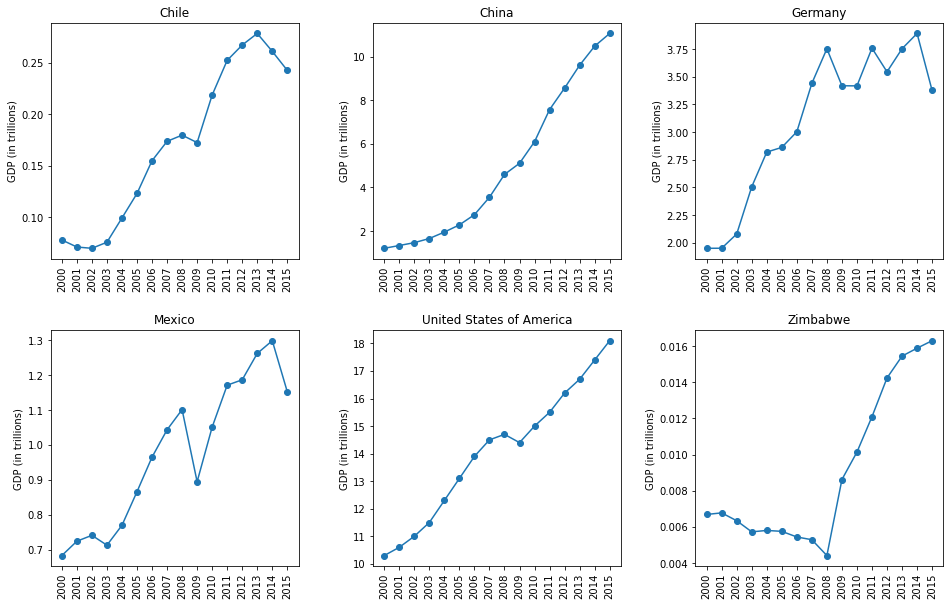

In [20]:
plt.figure(figsize=(16,10))
n = 0
for country in country_variables:
    n += 1
    ax = plt.subplot(2,3,n)
    plt.plot(range(len(country["Year"])), country["gdp_trillions"], marker="o")
    ax.set_xticks(range(len(country["Year"])))
    ax.set_xticklabels(years, rotation=90)
    plt.title(countries[n-1])
    plt.ylabel("GDP (in trillions)")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

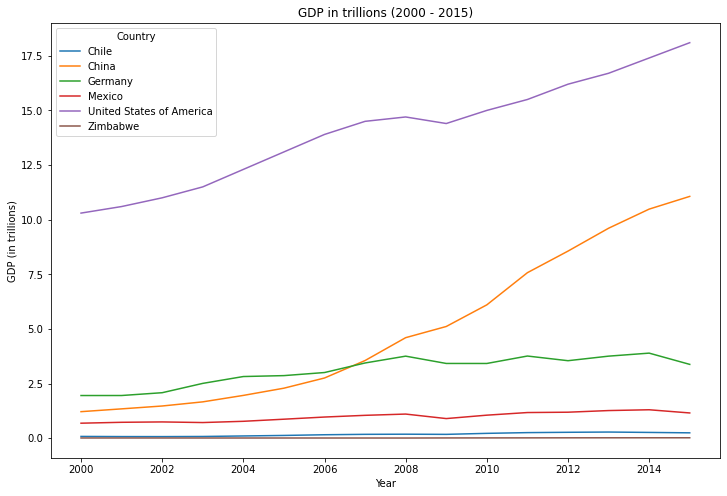

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="Year", y="gdp_trillions", hue="Country")
plt.title("GDP in trillions (2000 - 2015)")
plt.ylabel("GDP (in trillions)")
plt.show()

##### Comments:
*We can see that **China** and the **United States** both had exponential growth in GDP from 2000 to 2015. We can see a dip in GDP in all countries, with the exception of China and Zimbabwe, in 2009 which could be a result of the 2007/2008 global financial crisis.*

**_Germany's_** *growth seems to have stagnated since 2009, with GDP falling in 2015 to below 2008 levels. **Mexico** and **Chile** also saw a similar drop in GDP in 2015. **Zimbabwe's** GDP was on a steady decline between 2000 to 2008, however there has been exponential growth from 2009 to 2015.*

***Plotting a line graph showing change in Life Expectancy (in years) between 2000 to 2015.***

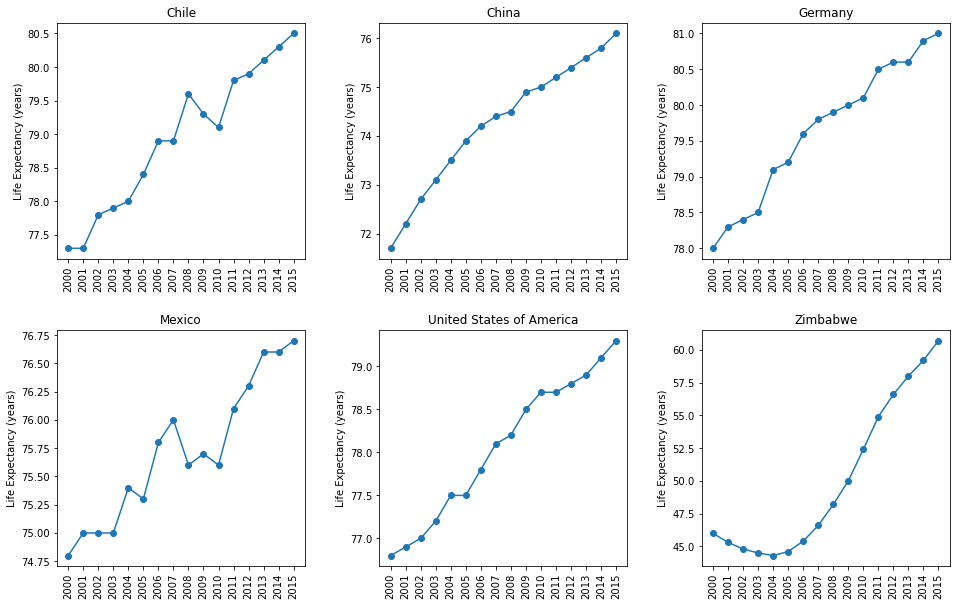

In [22]:
plt.figure(figsize=(16,10))
n = 0
for country in country_variables:
    n += 1
    ax = plt.subplot(2,3,n)
    plt.plot(range(len(country["Year"])), country["Life expectancy at birth (years)"], marker="o")
    ax.set_xticks(range(len(country["Year"])))
    ax.set_xticklabels(years, rotation=90)
    plt.title(countries[n-1])
    plt.ylabel("Life Expectancy (years)")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

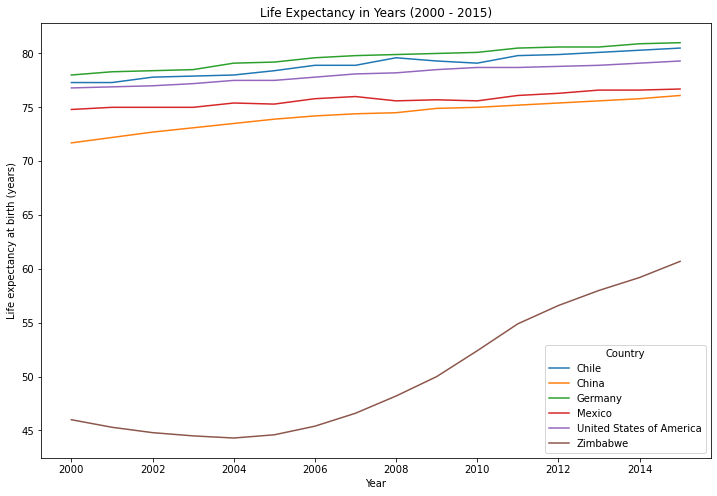

In [23]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country")
plt.title("Life Expectancy in Years (2000 - 2015)")
plt.show()

##### Comments:

*All countries are seeing exponential growth in life expectancy. Both **Chile** and **Mexico** saw a drop in life expectancy between 2008 to 2010. **Germany** has the highest life expectancy, followed closely by **Chile**. **Zimbabwe's** life expectancy has seen huge growth from 2004 onwards.*

***Creating a scatter plot to examine the relationship between GDP and Life Expectancy***

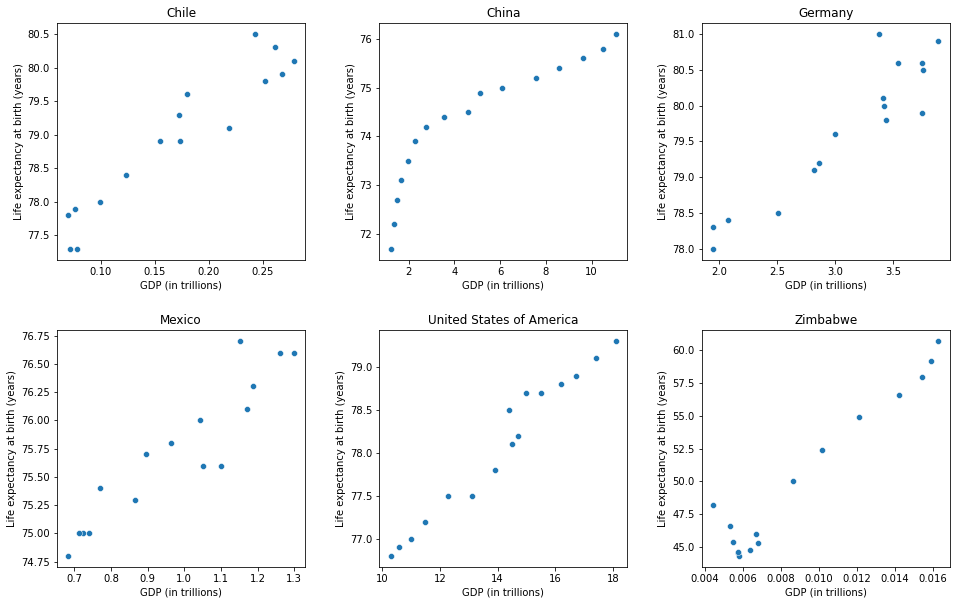

In [24]:
plt.figure(figsize=(16,10))
n = 0
for country in country_variables:
    n += 1
    ax = plt.subplot(2,3,n)
    sns.scatterplot(data=country, x="gdp_trillions", y="Life expectancy at birth (years)")
    plt.title(countries[n-1])
    plt.xlabel("GDP (in trillions)")
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

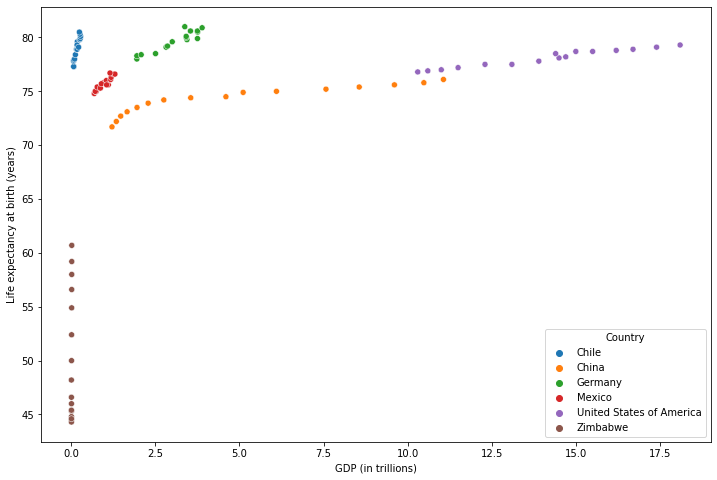

In [25]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="gdp_trillions", y="Life expectancy at birth (years)", hue="Country")
plt.xlabel("GDP (in trillions)")
plt.show()

##### Comments:

*The scatter plots seem to show a postive correlation between the GDP of a country and the life expectancy*

***Creating Violin Plots of Life Expectancy and GDP by country***

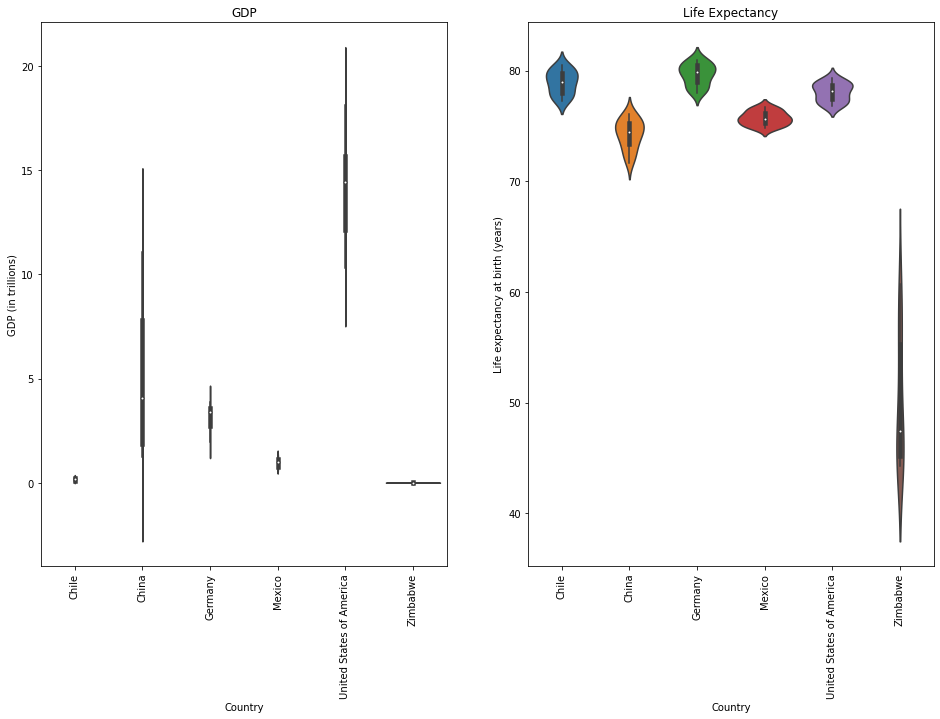

In [26]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.violinplot(data=df, x="Country", y="gdp_trillions")
plt.xticks(rotation=90)
plt.title("GDP")
plt.ylabel("GDP (in trillions)")
plt.subplot(1,2,2)
sns.violinplot(data=df, x="Country", y="Life expectancy at birth (years)")
plt.xticks(rotation=90)
plt.title("Life Expectancy")
plt.show()

##### Comments:

*The GDP plot shows **China** and the **United States** had the most variation in GDP. While the Life Expectancy plot shows **Zimbabwe** has the most variation.*

***Creating a dataframe with mean Life Expectancy and GDP by country.***

In [27]:
df_mean = df.drop("Year", axis=1).groupby("Country").mean().reset_index()

In [28]:
df_mean

,Country,Life expectancy at birth (years),GDP,gdp_trillions
0,Chile,78.94375,1.697888e+11,0.169789
1,China,74.26250,4.957714e+12,4.957714
2,Germany,79.65625,3.094776e+12,3.094776
3,Mexico,75.71875,9.766506e+11,0.976651
4,United States of America,78.06250,1.407500e+13,14.075000
5,Zimbabwe,50.09375,9.062580e+09,0.009063


**_Barplots comparing mean GDP and Life Expectancy between countries_**

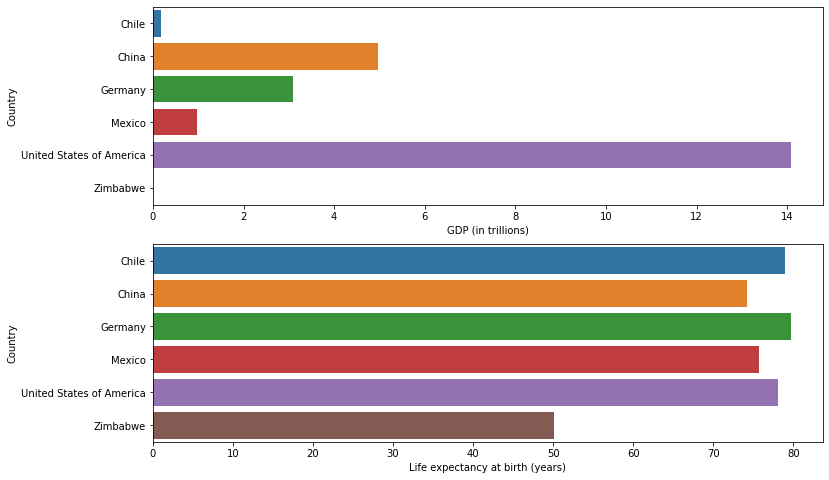

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.barplot(data=df_mean, x="gdp_trillions", y="Country")
plt.xlabel("GDP (in trillions)")
plt.subplot(2,1,2)
sns.barplot(data=df_mean, x="Life expectancy at birth (years)", y="Country")
plt.show()

##### Comments:

*The **United States** far outshines the rest of the countries in terms of GDP. **Zimbabwe's** GDP is so small in comparison that it is not even visible on the plot. The average Life Expectancy is much closer, with all but **Zimbabwe** in the high 70's.*